In [8]:
#pip install rlda
import sys
print(sys.executable)

/home/snorre/anaconda3/bin/python


In [1]:
import rlda

In [2]:
import pandas as pd
#sample_data = rlda.speeches_data
df = pd.read_csv('/home/snorre/Dropbox/Forskning/bigdata/data_inspections/data/topic_modelling_dataset.csv').drop('bow',axis=1)
speeches = list(df.message)

/home/snorre/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/snorre/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
df.message.apply(type).value_counts()

<class 'str'>    46209
Name: message, dtype: int64

In [218]:
#robust_model.features[0:100]

In [3]:
robust_model = rlda.RLDA()

In [4]:
# Preprocessing is adapted to our use case
clean_speeches = [rlda.process_documents(speech) for speech in speeches]
robust_model.get_tdm(clean_speeches)

In [6]:
k_list = list(range(10,95,5))

In [ ]:
n_iter = 1000

In [ ]:
robust_model.fit_models(k_list = k_list, n_iter = n_iter)

INFO:lda:n_documents: 46209
INFO:lda:vocab_size: 30000
INFO:lda:n_words: 1808225
INFO:lda:n_topics: 10
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -21021457
INFO:lda:<10> log likelihood: -17582714
INFO:lda:<20> log likelihood: -17061536
INFO:lda:<30> log likelihood: -16730772
INFO:lda:<40> log likelihood: -16537479
INFO:lda:<50> log likelihood: -16421866
INFO:lda:<60> log likelihood: -16338364
INFO:lda:<70> log likelihood: -16285516
INFO:lda:<80> log likelihood: -16249903
INFO:lda:<90> log likelihood: -16223491
INFO:lda:<100> log likelihood: -16203567
INFO:lda:<110> log likelihood: -16185908
INFO:lda:<120> log likelihood: -16175255
INFO:lda:<130> log likelihood: -16163499
INFO:lda:<140> log likelihood: -16156362
INFO:lda:<150> log likelihood: -16151887
INFO:lda:<160> log likelihood: -16144982
INFO:lda:<170> log likelihood: -16135492
INFO:lda:<180> log likelihood: -16134029
INFO:lda:<190> log likelihood: -16129425
INFO:lda:<200> log likelihood: -16128706
INFO:lda:<210> log likeli

INFO:lda:<940> log likelihood: -16178454
INFO:lda:<950> log likelihood: -16178560
INFO:lda:<960> log likelihood: -16176341
INFO:lda:<970> log likelihood: -16177385
INFO:lda:<980> log likelihood: -16177909
INFO:lda:<990> log likelihood: -16180842
INFO:lda:<999> log likelihood: -16177442
INFO:lda:n_documents: 46209
INFO:lda:vocab_size: 30000
INFO:lda:n_words: 1808225
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -23213223
INFO:lda:<10> log likelihood: -18079084
INFO:lda:<20> log likelihood: -17398723
INFO:lda:<30> log likelihood: -17028513
INFO:lda:<40> log likelihood: -16806042
INFO:lda:<50> log likelihood: -16667821
INFO:lda:<60> log likelihood: -16574528
INFO:lda:<70> log likelihood: -16515752
INFO:lda:<80> log likelihood: -16466594
INFO:lda:<90> log likelihood: -16436381
INFO:lda:<100> log likelihood: -16407658
INFO:lda:<110> log likelihood: -16385590
INFO:lda:<120> log likelihood: -16369787
INFO:lda:<130> log likelihood: -16357240
INFO:lda:<140> log likeli

INFO:lda:<870> log likelihood: -16265275
INFO:lda:<880> log likelihood: -16266830
INFO:lda:<890> log likelihood: -16266323
INFO:lda:<900> log likelihood: -16268433
INFO:lda:<910> log likelihood: -16263179
INFO:lda:<920> log likelihood: -16264446
INFO:lda:<930> log likelihood: -16266460
INFO:lda:<940> log likelihood: -16265427
INFO:lda:<950> log likelihood: -16266657
INFO:lda:<960> log likelihood: -16266699
INFO:lda:<970> log likelihood: -16265562
INFO:lda:<980> log likelihood: -16264410
INFO:lda:<990> log likelihood: -16265451
INFO:lda:<999> log likelihood: -16264881
INFO:lda:n_documents: 46209
INFO:lda:vocab_size: 30000
INFO:lda:n_words: 1808225
INFO:lda:n_topics: 30
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -24495614
INFO:lda:<10> log likelihood: -18386797
INFO:lda:<20> log likelihood: -17594508
INFO:lda:<30> log likelihood: -17192682
INFO:lda:<40> log likelihood: -16959093
INFO:lda:<50> log likelihood: -16815382
INFO:lda:<60> log likelihood: -16722247
INFO:lda:<70> log like

In [ ]:
#robust_model.get_all_ftp(features_top_n = 50)

In [ ]:
robust_model.get_cosine_matrix()

In [ ]:
## Now we should run the spectral clustering to compare intra cluster distance.
clusters = robust_model.cluster_topics(clusters_n = 50)
## in the wilkerson text there does not seem to be a great average, but one should search using their average intra topic cosine similarity.



In [17]:
len(clusters)

850

In [19]:

robust_model.cos_X.shape

(850, 850)

In [ ]:
import numpy as np
def get_intra_cluster_sim(cluster):
    cos_matrix = robust_model.cos_X
    sims = []
    for i in range(len(cluster)-1):
        c = cluster[i]
        for j in range(i+1,len(cluster)):
            c2 = cluster[j]
            sims.append(cos_matrix[i,j])
    #print(np.mean(sims))
    return np.mean(sims),sims        


In [ ]:
#clusters = robust_model.cluster_topics(clusters_n = k)

In [ ]:


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
av_intra_sim = []
sims = []


In [24]:
for k in range(15,301):
    temp_clusters = robust_model.cluster_topics(clusters_n = k)
    clus2idx = {clus:[] for clus in set(temp_clusters)}
    for num,clus in enumerate(temp_clusters):
        clus2idx[clus].append(num)
    intra_sim = []
    for cluster in clus2idx.values():
        av_sim,similarities = get_intra_cluster_sim(cluster)
        intra_sim.append(av_sim)
        sims.append(similarities)
#    print(np.nanmean(intra_sim))
    av_intra_sim.append(np.nanmean(intra_sim))


/home/snorre/anaconda3/lib/python3.6/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/snorre/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/snorre/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


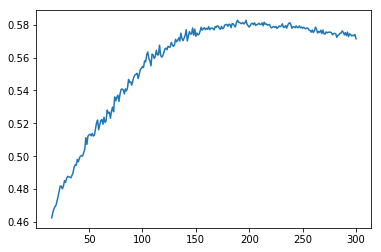

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(15,301),av_intra_sim)

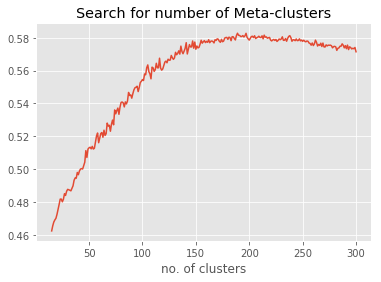

In [463]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.plot(range(15,301),av_intra_sim)
plt.title('Search for number of Meta-clusters')
plt.xlabel('Intra-cluster similarity')
plt.xlabel('no. of clusters')
plt.savefig('output/research_conclusions/wilkerson_no_clusters.png')


In [47]:
max(zip(av_intra_sim,range(15,301)))

(0.5827318124259615, 189)

In [50]:
#robust_model.k_list
! mkdir robust_output

In [51]:
robust_model.save_models_classificiations('robust_output/')

In [ ]:
temp_clusters = robust_model.cluster_topics(clusters_n = 189)
clus2idx = {clus:[] for clus in set(temp_clusters)}
for num,clus in enumerate(temp_clusters):
    clus2idx[clus].append(num)

In [54]:
temp_clusters = robust_model.cluster_topics(clusters_n = 177)
clus2idx = {clus:[] for clus in set(temp_clusters)}
for num,clus in enumerate(temp_clusters):
    clus2idx[clus].append(num)

/home/snorre/anaconda3/lib/python3.6/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [57]:
#clus2idx

In [63]:
Counter(temp_clusters).most_common(20)

[(1, 234),
 (7, 13),
 (2, 10),
 (107, 9),
 (3, 9),
 (91, 7),
 (15, 7),
 (131, 7),
 (50, 7),
 (160, 7),
 (29, 7),
 (39, 6),
 (10, 6),
 (37, 6),
 (18, 5),
 (28, 5),
 (153, 5),
 (35, 5),
 (27, 5),
 (90, 5)]

In [101]:
#for clus in clus2idx:
#    for tid in clud2idx:
#inspect cluster 7
cluster_probs = []
for clus in set(temp_clusters):
    
    c = Counter()
    for tid in clus2idx[clus]:
        label = robust_model.topic_labels[tid]
        weights = robust_model.ftps[tid]['top_features'][0:10]
        for word,w in weights:
            c[word]+=w
    cluster_probs.append(c)
    print(clus,c.most_common(15))

1 [('så', 2.750000662051001), ('kan', 2.2257369360402826), ('vores', 1.2110992710387054), ('danmark', 1.0657957521229764), ('dag', 1.0451091905970722), ('mere', 0.8818168866381001), ('__url__', 0.7751192692520833), ('år', 0.6438794424464265), ('ved', 0.5576169800147942), ('godt', 0.5174218779238753), ('flere', 0.47469156769622234), ('danske', 0.4603213042972844), ('venstre', 0.4411423916715255), ('tak', 0.41576659186808834), ('mennesker', 0.4119381610336581)]
2 [('eu', 1.1353461938808764), ('europa', 0.27584230628398665), ('danmark', 0.21505369177658182), ('europæiske', 0.148173140860863), ('mere', 0.1273114891209878), ('danske', 0.12437183553177213), ('__url__', 0.11098117467103104), ('bruxelles', 0.09197438953092613), ('europa-parlamentet', 0.08733587068698771), ('morten', 0.07241284508246189), ('nej', 0.04243011473209059), ('lande', 0.040692977987017015), ('samarbejde', 0.009599208521028921), ('ja', 0.009338079470198676)]
3 [('__url__', 0.6677809131227903), ('læs', 0.435312005373538

In [106]:
import pickle
pickle.dump(cluster_probs,open('robust_output/cluster_topwords.pkl','wb'))

In [139]:
# 39 er sundhed, 27 er immigration, 

In [140]:
json.dump(list(robust_model.topic_labels),open('robust_output/clus_names','w'))

In [104]:
import json
json.dump([int(i) for i in temp_clusters],open('robust_output/meta_clusters','w'))

In [34]:
import pandas as pd
pd.Series(av_intra_sim).rolling(window=5).mean().argmax()

/home/snorre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


177

In [36]:
15+pd.Series(av_intra_sim).rolling(window=5).mean().argmax()

/home/snorre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


192

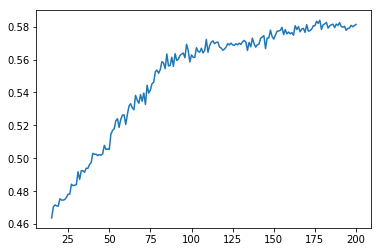

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(15,201),av_intra_sim)

In [464]:
## After running this we should 

### dump the classifications.
#robust_model.save_models_classificiations()

### match the top terms to our dictionaries,
#fcps = robust_model.get_fcp(clusters)
# match terms

### estimate proportions for each topic in the cluster, and average to get our conclusions.


In [135]:
most_pred_clus = robust_model.get_fcp(temp_clusters)

In [138]:
#labels[8]


## Evaluate meta clusters

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
class2english = {'kunst _musik_museum_kulturpol': 'Culture', ' klima_ miljø _ naturen ': 'Environment',
                 'undervis_folkeskole_ungdomsuddan': 'Education', 'udenrig_ forsvaret _militær': 'Foreign affairs',
                 ' EU _ eu': 'EU', ' sundhed': 'Health',
                 'indvandr_flygt_udlænding': 'Immigration', ' beskæftig': 'Employment', 'skat': 'Taxes', 
                 'forskning_ universitet_videregående udd': 'Science',
                 ' religi_ værdipol': 'Religion', ' økonom_ vækst': 'Economy', 
                 'kriminal_kriminel': 'Crime', 'hjemmehjælp_ ældre _ pension_ plejehjem': 'Elder care',
                 'fattig_socialt udsat_socialminis_svageste': 'Social policy'}
def get_dic_name(num):
    return class2english[class2num[int(num)]]
import pickle,json,networkx as nx

In [109]:
import pickle
base = '/home/snorre/Dropbox/Forskning/bigdata/data_inspections/'
pol_df,noise_df, Index = pickle.load(open(base+'topic_simulation_dependencies.pkl','rb'))
import json
class2num = dict(pol_df[['topic','topic_class']].values)
class2num = sorted(class2num,key=lambda x: class2num[x])
dictionary = [(topic,set(values)) for topic,values in json.load(open('dictionary_topics.js','r')).items()]
from nltk.stem.snowball import DanishStemmer
import nltk
stemmer = DanishStemmer()

w2lex = {}

for topic,vals in dictionary:
    for val in vals:
        if val in w2lex:
            w2lex[val].append(topic)
            #print(val,topic,w2lex[val])
        w2lex[val] = [topic]

lex2idx = {topic:set() for topic in class2num}
#idx2lex = {idx:lex for lex,indices in lex2idx.items() for idx in indices }
in_lex = set()
for num,w in enumerate(Index):
    if w in w2lex:
        topics = w2lex[w]
        for topic in topics:
            lex2idx[topic].add(num)
    w_stem = stemmer.stem(w)
    if w_stem in w2lex:
        topics = w2lex[w_stem]
        for topic in topics:
            lex2idx[topic].add(num)

idx2lex = {}
for dicname,values in lex2idx.items():
    for val in values:
        idx2lex[val] = dicname

sum([len(s) for s in lex2idx.values()]),len(w2lex),len(idx2lex)

(1338, 692, 1338)

In [111]:
topwords= pickle.load(open('Topword_Occurence.pkl','rb'))
def load_dataframe(filename,names = ['word','idx','include','top_occurence']):
    try:
        df = pd.read_csv(filename,names = names,encoding='latin1')
    except:
        df = pd.read_csv(filename,names = names,encoding='utf-8')
    return df
suspect_df = pd.read_csv('lexicon_extension_suspects.csv')
dones = []
for name,groupdf in suspect_df.groupby('best_match'):
    filename = 'lexicon_extension_%s.csv'%name
    done_df = load_dataframe(filename)
    dones.append(done_df)
done_df = pd.concat(dones)
print(len(done_df))
include = set(done_df[done_df.include>=2].idx)
include2 = set(done_df[done_df.include>=1].idx)
#dict(suspect_df[suspect_df.idx.isin(include)][['idx','best_match_dk']].values)
idx2lex.update(dict(suspect_df[suspect_df.idx.isin(include)][['idx','best_match_dk']].values))
idx2lex_extent = idx2lex.copy()
idx2lex_extent.update(dict(suspect_df[suspect_df.idx.isin(include2)][['idx','best_match_dk']].values))    
#len(idx2lex),sum([topwords[idx] for idx in idx2lex])/sum(topwords.values()),sum([topwords[idx] for idx in idx2lex_extent])/(sum(topwords.values())-sum([topwords[idx] for idx in range(noise_start_w,len(Index))]))

2364


In [186]:
w2lex = {Index[i]:lex for i,lex in idx2lex.items()}

In [187]:
lex2w = {lex:set() for lex in set(w2lex.values())}
for w,lex in w2lex.items():
    lex2w[lex].add(w)

In [190]:
import numpy as np
labels = []
for probs in cluster_probs:
    lex_count = Counter()
    for word,w in probs.items():
        if not word in w2lex: 
            continue
        lex = w2lex[word]
        lex_count[lex]+=w
    sum_ = sum(lex_count.values())
    frac_lex = Counter()
    for lex,count in lex_count.items():
        frac_lex[lex] = count/sum_
    if len(lex_count)>1:
        best = max(frac_lex.items(),key=lambda x: x[1])
        
        if best[1]<0.6:
         #   print(frac_lex)
            #print(best[1])
            labels.append((np.nan,0))
            continue
            
        #print(,key=lambda x: x[1]),lex_count)
    if len(frac_lex)==0:
        best_label = np.nan
        labels.append((np.nan,0))
        continue
    else:
        best_label = frac_lex.most_common(1)[0][0]
    topoverlap = len(lex2w[best_label]&set(probs))
    labels.append((best_label,topoverlap))

In [484]:
import pandas as pd
cross_tabs = []
compare_df = pol_df[['topic']]

for i in range(10,95,5):
    #for num, topic_label in enumerate(robust_model.topic_labels):
    
    path = 'robust_output/classifications/tm_k_%d_class.csv'%i
    classifications = pd.read_csv(path)
    classifications['real_class'] = pol_df.topic
    cross = classifications.groupby('top_topic').real_class.value_counts().unstack()
    #cross_normed = 
    cross_tabs.append(cross)
    top_dummy = pd.get_dummies(data=classifications['top_topic'],prefix='%d'%i,prefix_sep='-')
    meta_labels = np.array(robust_model.topic_labels)
    compare_df = pd.concat([compare_df,top_dummy],axis=1)
    
    

In [486]:
mid2pos = {mid:num for num,mid in enumerate(range(10,95,5))}

In [517]:
clus2cross = []
clus2size = []
meta_labels = np.array(robust_model.topic_labels)
clus2precision = []
classification_df = pol_df[['topic']]
for clus in range(1,len(labels)+1):
    topics = clus2idx[clus]
    topic_labels = np.array(meta_labels)[np.array(topics)]
    
    all_cols = compare_df[list(topic_labels)].sum(axis=1).values / len(topic_labels)
    classification_df[clus-1] = all_cols
    
    tab_idx = [tuple(map(int,label.split('-'))) for label in topic_labels]
    tabs = []
    sizes = []
    for mid,tid in tab_idx:
        mid = mid2pos[mid]
        cross = cross_tabs[mid]
        t2size = cross.sum(axis=1)
        cross_normed = (cross.T/cross.sum(axis=1)).T
        tabs.append(cross_normed.loc[tid])
        sizes.append(t2size.loc[tid])
    clus2cross.append(pd.DataFrame(tabs))
    clus2size.append(sizes)

/home/snorre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [672]:
classification_df.shape
## Maybe Calculate Opportunism on this latent representation of 177 meta topics. 

(46209, 178)

In [689]:
from scipy.optimize import curve_fit
import sklearn
def linear_func(x, a, b):
    return a*x + b
def fit_function(x,y,func=linear_func,plot=False):
    popt, pcov = curve_fit(func, x, y)
    fit_y = func(np.linspace(min(x),max(x),50),*popt)
    if plot:        
        return popt,sklearn.metrics.r2_score(y,func(np.array(x),*popt)),(np.linspace(min(x),max(x),50),fit_y)
    else:
        return popt,sklearn.metrics.r2_score(y,func(np.array(x),*popt))
def get_correlation_nposts_response(group):
    average_likes = group.groupby('topic')['rolling_normalized_likes'].mean()
    size_topic = group.groupby('topic').size()
    size_topic = size_topic/sum(size_topic) # normalize by size to make coefficent comparable.
    parameters,rsquared = fit_function(size_topic,average_likes)
    coefficient = parameters[0]
    return coefficient,rsquared#{'beta':coefficient,'r2':rsquared}
#doc2topic.shape
def get_correlation_nposts_response2(group):
    average_likes = group.groupby('topic')['rolling_normalized_likes'].mean()
    size_topic = group.groupby('topic').size()
    size_topic = size_topic/sum(size_topic) # normalize by size to make coefficent comparable.
    return np.corrcoef(size_topic,average_likes)[0][1]
def rolling_operation(group,column='likes'):
    rollingwindow = group.sort_values(by='t',axis=0)[column].rolling(window=10, center=True)
    group['moving_average_%s'%column] = rollingwindow.mean()
    group['moving_std_%s'%column] = rollingwindow.std()
    # create the normalized
    group['rolling_normalized_%s'%column] = (group[column] - group['moving_average_%s'%column])/ group['moving_std_%s'%column]
    return group

var_df = pol_df.groupby('page_id').apply(rolling_operation)[['id','rolling_normalized_likes','party','topic']]
norm_response = var_df.rolling_normalized_likes.values

In [692]:
p2pandering = var_df.groupby('party').apply(get_correlation_nposts_response2).reset_index()
p2pandering.columns = ['party','correlation']
# dictionary based

In [675]:
party_dummy = pd.get_dummies(pol_df.party)
party2idx = party_dummy.columns
party_mat = party_dummy.values

Alternativet
Most prioritized:
(' klima_ miljø _ naturen ', 1)
(' klima_ miljø _ naturen ', 5)
(' klima_ miljø _ naturen ', 6)
Best feeback:
('undervis_folkeskole_ungdomsuddan', 6)
('undervis_folkeskole_ungdomsuddan', 5)
('undervis_folkeskole_ungdomsuddan', 5)
('hjemmehjælp_ ældre _ pension_ plejehjem', 3)
('indvandr_flygt_udlænding', 2)

Dansk Folkeparti
Most prioritized:
('indvandr_flygt_udlænding', 3)
('indvandr_flygt_udlænding', 4)
('kriminal_kriminel', 3)
('kriminal_kriminel', 5)
Best feeback:
('undervis_folkeskole_ungdomsuddan', 5)
('indvandr_flygt_udlænding', 4)
('indvandr_flygt_udlænding', 4)
('indvandr_flygt_udlænding', 4)

Det Konservative Folkeparti
Most prioritized:
('kriminal_kriminel', 3)
('skat', 1)
(' økonom_ vækst', 3)
('kriminal_kriminel', 5)
(' økonom_ vækst', 3)
Best feeback:
(' religi_ værdipol', 6)
(' religi_ værdipol', 4)

Enhedslisten
Most prioritized:
('udenrig_ forsvaret _militær', 6)
('forskning_ universitet_videregående udd', 2)
(' klima_ miljø _ naturen ', 

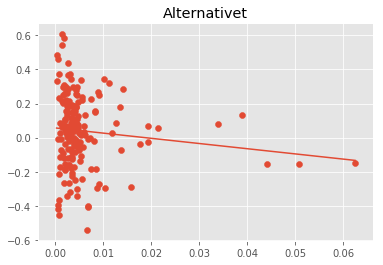

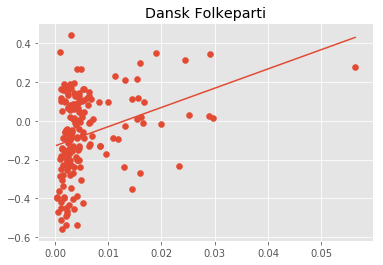

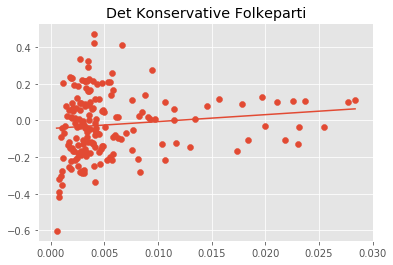

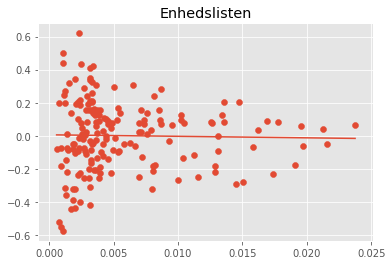

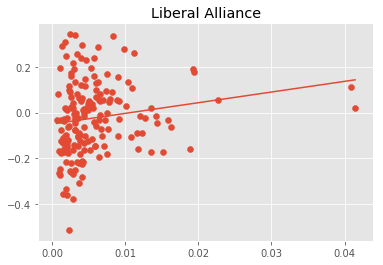

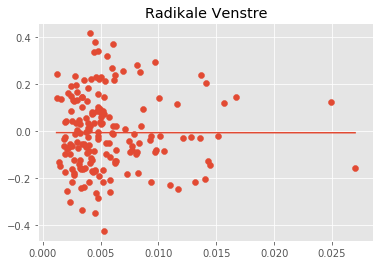

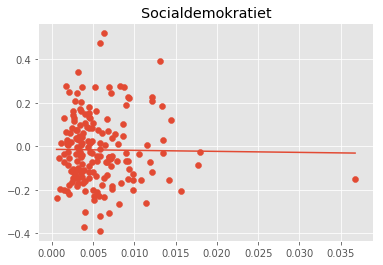

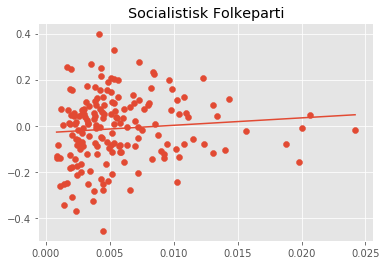

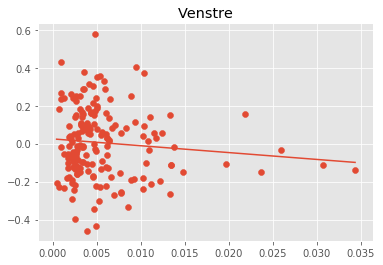

In [720]:
d2t = classification_df[list(range(177))].values
corr_coef = []
coef = []
r2s = []
dat = []
for p_num,boolean in enumerate(party_mat.T):
    if party2idx[p_num] in set(['Kristendemokraterne','Fremskridtspartiet']):
        continue
    boolean = boolean>0
    x = []
    y = []
    for vec in d2t.T:
        temp = vec[boolean]
        score = norm_response[boolean]
        y.append(np.nansum(temp*score)/temp.sum()) # average Response

        #y.append(norm_response[boolean>0]))
        #x.append(temp.sum())
        x.append(temp.sum())
    x,y = np.array(x),np.array(y)
    x,y = np.nan_to_num(x),np.nan_to_num(y)
    corr_coef.append(np.corrcoef(x,y)[0][1])
    sum_ = sum(x)
    x = np.array(x)/sum_
    ab,r2,(xlim,ypred) = fit_function(x,y,plot=True)
    plt.figure()
    plt.plot(xlim,ypred)
    plt.scatter(x,y)
    plt.title(party2idx[p_num])
    print(party2idx[p_num])
    print('Most prioritized:')
    for bestidx in x.argsort()[::-1][0:5]:
        lab = labels[bestidx]
        if type(lab[0])!=str:
            continue
        print(lab)
    print('Best feeback:')
    for bestidx in y.argsort()[::-1][0:5]:
        lab = labels[bestidx]
        if type(lab[0])!=str:
            continue
        print(lab)
    print()
    #ab,r2,vals = fit_function(x,y,plot=True)
    #plt.figure()
    #plt.title(party2idx[p_num])
    #plt.scatter(x,y)
    #x,y = zip(*vals)
    #x,y = vals
    #plt.plot(x,y)
    #print(p_num,party2idx[p_num],ab[0],r2)
    r2s.append(r2)
    coef.append(ab)

### Pretty amazing that the most prioritized topics are so spot on. 

In [696]:
p2pandering_robust = pd.DataFrame({'party':party2idx,'r2':r2s,'corr':corr_coef})
#sns.barplot(y=party2idx,x=r2s)

In [698]:
p2pandering = p2pandering_robust.merge(p2pandering)

0.7272727272727273

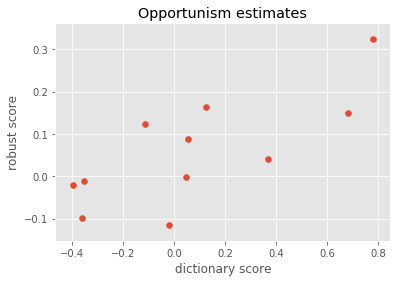

In [721]:
plt.title('Opportunism estimates')
x,y = p2pandering.correlation,p2pandering['corr']
plt.scatter(x,y)
plt.ylabel('robust score')
plt.xlabel('dictionary score')
plt.savefig('output/research_conclusions/wilkerson_opportunism_comparison.png')
quantify_de_ascending(x.values,y.values)

In [725]:
#sns.barplot(y=party2idx,x=corr_coef)

In [775]:
import sklearn
def score_meta_topic(y_test,probs,pred):
    ac = sklearn.metrics.accuracy_score(y_test,pred)
    precision = sklearn.metrics.precision_score(y_test,pred)
    recall = sklearn.metrics.recall_score(y_test,pred)
    f1 = sklearn.metrics.f1_score(y_test,pred)
    d = {'f1':f1,'recall':recall,'precision':precision,'accuracy':ac}
    
    # compute roc curve
    d['auc'] = sklearn.metrics.roc_auc_score(y_test,probs)
        
    return d

    
dat = []
category2size = []
for overlap_thres in range(1,5):
    believed_df = pol_df[['topic']].copy()
    believed2clus = {category: set() for category in set(compare_df.topic)}
    for num,(label,topoverlap) in enumerate(labels):
        if topoverlap>=overlap_thres:
            if type(label) == str:
                believed2clus[label].add(num)
    has_prediction = 0
    for label in believed2clus:
        cols = list(believed2clus[label])
        if len(cols)>0:
            has_prediction+=1
        classifications = classification_df[cols].sum(axis=1)
        category2size.append((class2english[label],classifications.sum(),overlap_thres))
        believed_df[label] = classifications
    
    if has_prediction!=15:
        break
    y_df = pd.get_dummies(believed_df.topic)
    y_pred_df = believed_df[[col for col in believed_df.columns if not 'topic'==col]]
    
    for col in y_df.columns:
        y = y_df[col]
        y_pred = y_pred_df[col]
        y_pred_binary2 = (y_pred>min(y_pred[y_pred>0])).astype(int)
        y_pred_binary = (y_pred>0).astype(int)
        d = score_meta_topic(y,y_pred,y_pred_binary)
        d2 = score_meta_topic(y,y_pred,y_pred_binary2)
        for score in ['f1','precision','recall','accuracy']:
            d[score+'_cut'] = d2[score]
        d['topic'] = class2english[col]
        d['topoverlap'] = overlap_thres
        dat.append(d)

    

In [776]:
meta_performance = pd.DataFrame(dat)

In [777]:
meta_performance.groupby('topoverlap').mean()

,accuracy,accuracy_cut,auc,f1,f1_cut,precision,precision_cut,recall,recall_cut
topoverlap,,,,,,,,,
1,0.905956,0.913571,0.773181,0.461059,0.463372,0.420968,0.455375,0.591939,0.559921
2,0.929879,0.934363,0.765562,0.509722,0.502287,0.501834,0.559367,0.561906,0.516908


In [778]:
# choose the best cutoff for matching via the dictionary
meta_performance = meta_performance[meta_performance['topoverlap'] == 2]

In [779]:
meta_performance = meta_performance.drop('topoverlap',axis=1)

In [780]:
robust_size_df = pd.DataFrame(category2size,columns=['topic','robust_size','topoverlap'])
robust_size_df = robust_size_df[robust_size_df.topoverlap==2]
robust_size_df = robust_size_df.drop('topoverlap',axis=1)
meta_performance = meta_performance.merge(robust_size_df,on='topic')
performance = pd.read_csv('dictionary_performance.csv')
size = pd.DataFrame(pol_df.topic_class.value_counts()).reset_index()

size.columns = ['topic_class','n_docs']
size['topic_name'] = size.topic_class.apply(get_dic_name)
s = cat_performance.n_docs.values
meta_performance = meta_performance.merge(performance[[col for col in performance.columns if not col=='topic']],left_on='topic',right_on='topic_name',suffixes=('_robust','_dictionary'))
meta_performance = meta_performance.merge(size,left_on='topic',right_on='topic_name')

In [781]:
x,y = meta_performance.robust_size.values, meta_performance.n_docs.values

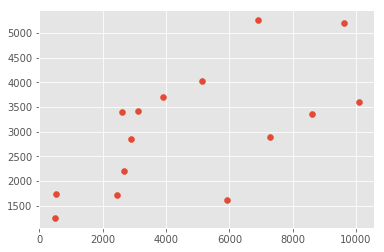

In [782]:
plt.scatter(x,y)

In [783]:
meta_performance.to_csv('robust_output/metacluster_performance_overlap2.csv',index=False)

In [784]:
meta_performance[meta_performance.accuracy_w == meta_performance.accuracy_w.min()]

,accuracy_robust,accuracy_cut,auc,f1,f1_cut,precision_robust,precision_cut,recall_robust,recall_cut,topic,...,accuracy_w,n,precision_dictionary,precision_w,recall_dictionary,recall_w,topic_name_x,topic_class,n_docs,topic_name_y
6,0.96611,0.971542,0.57359,0.201835,0.128562,0.278481,0.375969,0.158273,0.077538,Social policy,...,0.785505,98,0.909091,0.909091,0.833333,0.630068,Social policy,14,1251,Social policy


In [726]:
meta_performance[meta_performance.auc==meta_performance.auc.min()]

,accuracy_robust,auc,f1,precision_robust,recall_robust,topic,robust_size,accuracy_dictionary,accuracy_w,n,precision_dictionary,precision_w,recall_dictionary,recall_w,topic_name_x,topic_class,n_docs,topic_name_y
6,0.96611,0.57359,0.201835,0.278481,0.158273,Social policy,484.5,0.846939,0.785505,98,0.909091,0.909091,0.833333,0.630068,Social policy,14,1251,Social policy


In [785]:
unstacked = meta_performance[['auc','accuracy_robust','precision_robust','recall_robust','f1']].unstack().reset_index()
unstacked['topic'] = list(meta_performance['topic'])*5

In [755]:
#unstacked.columns = ['score','empty',0,'topic']

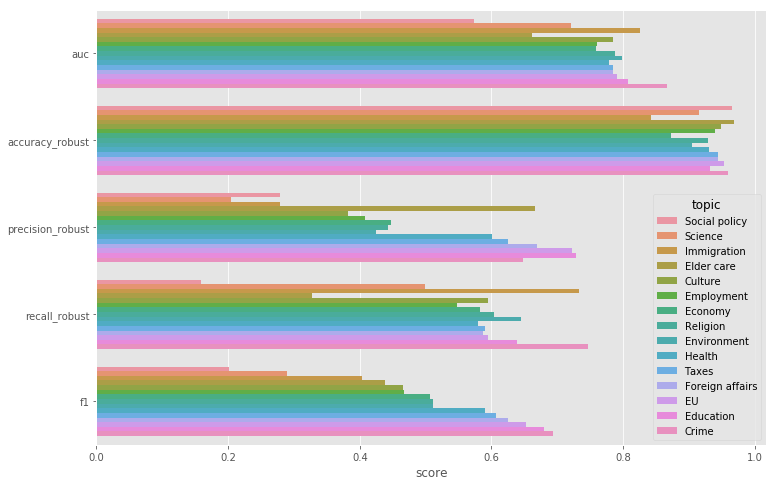

In [765]:
plt.figure(figsize=(12,8))
sns.barplot(y='score',x=0,data=unstacked,hue='topic',hue_order = meta_performance.sort_values('f1').topic.values)
plt.ylabel('')
plt.xlabel('score')
plt.savefig('output/research_conclusions/wilkerson_performance.png')

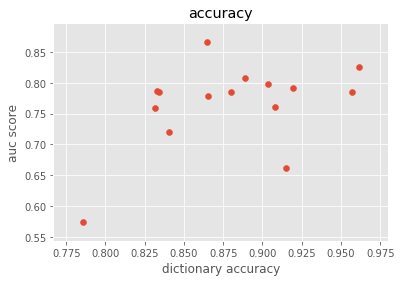

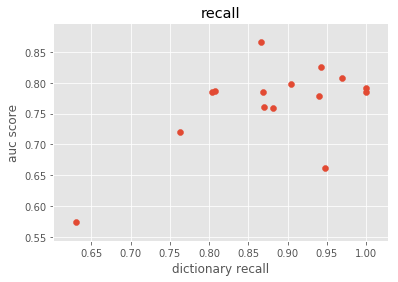

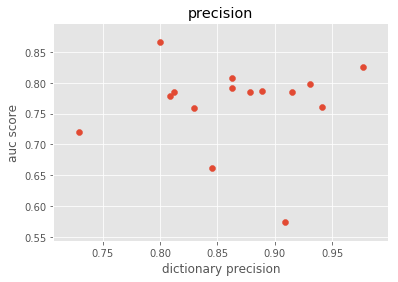

In [663]:
## See if they correlate with dictionary performance.
for score in ['accuracy','auc','f1','recall','precision']:
    try:
        x,y = meta_performance[score+'_dictionary'].values,meta_performance[score+'_robust'].values
        x2 = meta_performance[score+'_w'].values
        y3 = meta_performance.auc.values
    except:    
        continue
    plt.figure()
    #plt.scatter(x,y)
    #plt.scatter(x2,y)
    plt.scatter(x2,y3)
    plt.ylabel('auc score')
    plt.xlabel('dictionary %s'%score)
    plt.title(score)
    #plt.legend()

## Analysis 2

In [786]:
dat = []
for num,(label,topoverlap) in enumerate(labels):
    tabs = clus2cross[num]
    sizes = clus2size[num]
    if type(label)!=str:
        continue
    
    vals = tabs[label]
    perc = vals.sum() / len(tabs)
    std = vals.std()
    
    size = np.mean(sizes)
    size_std = np.std(sizes)
    d = {'clus':num,'label':label,'perc':perc,'std':std,'topoverlap':topoverlap,'size':size,'size_std':size_std}
    dat.append(d)

In [787]:
clus_df = pd.DataFrame(dat)

In [788]:
clus_df['Label'] = clus_df.label.apply(lambda x: class2english[x])

In [789]:
clus_df.to_csv('robust_output/meta_cluster_performance.csv',index=False)

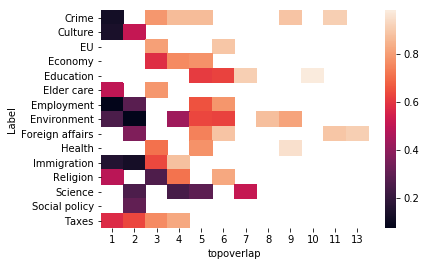

In [202]:
import seaborn as sns
sns.heatmap(clus_df.groupby(['Label','topoverlap']).perc.mean().unstack())


In [352]:
best_clus = clus_df[clus_df.topoverlap>=2]

In [790]:
performance = pd.read_csv('dictionary_performance.csv')
size = pd.DataFrame(pol_df.topic_class.value_counts()).reset_index()

size.columns = ['topic_class','n_docs']
size['topic_name'] = size.topic_class.apply(get_dic_name)
s = cat_performance.n_docs.values

In [791]:
def fit_function2(x,y,func=linear_func,plot=False):
    popt, pcov = curve_fit(func, x, y)
    xlim = np.linspace(min(x),max(x),50)
    fit_y = func(xlim,*popt)
    y_pred = func(x,*popt)
    error = x-y_pred
    r2 = sklearn.metrics.r2_score(y,y_pred)
    
    return xlim,fit_y,r2,error

import sklearn
def run_clus_comparison_analysis(topoverlap_thres = 2):
    best_clus = clus_df[clus_df.topoverlap>=topoverlap_thres]
    
    max_mean_clus = best_clus.groupby('Label').agg({'perc':['max','mean'],'size':['mean','sum']})#.plot(kind='bar')
    max_mean_clus['size_frac'] = max_mean_clus['size']['sum']/max_mean_clus['size']['sum'].sum()
    max_mean_clus['topic_name'] = max_mean_clus.index
    
    cat_performance = max_mean_clus.merge(performance,on='topic_name')
    cat_performance = cat_performance.merge(size,on='topic_name')
    
    s = cat_performance.n_docs.values
    cat_performance['doc_frac'] = s/s.sum()
    x,y = s/s.sum(),cat_performance[('size_frac','')].values

    _,_,r2,error = fit_function2(x,y)
    comparison_score = quantify_de_ascending(x,y)
    
    print('R2: ',r2)
    print('Direct comparisons: ',comparison_score)
    print(sum(x.argsort()*y.argsort())/sum(x.argsort()*x.argsort()))
    
    return cat_performance,r2,comparison_score,error

In [416]:
cat_performance_1 = run_clus_comparison_analysis(1)

R2:  0.40282732240446806
Direct comparisons:  0.7022222222222221


/home/snorre/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [431]:
for thres in range(1,10):
    print(thres)
    run_clus_comparison_analysis(thres)

1
R2:  0.23517156232792136
Direct comparisons:  0.631111111111111
0.7369458128078817
2
R2:  0.40282732240446806
Direct comparisons:  0.7022222222222221
0.8059113300492611
3
R2:  0.412950811118697
Direct comparisons:  0.6508875739644969
0.6107692307692307
4
R2:  0.09445460179607523
Direct comparisons:  0.5694444444444443
0.5988142292490118
5
R2:  0.07965582177153252
Direct comparisons:  0.52
0.6631578947368421
6
R2:  0.4831405851552284
Direct comparisons:  0.7160493827160495
0.7254901960784313
7
R2:  0.7271361499919673
Direct comparisons:  0.5555555555555556
0.7272727272727273
8


/home/snorre/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


R2:  0.6813891659297577
Direct comparisons:  0.4
0.5
9
R2:  0.40133654471915947
Direct comparisons:  0.5599999999999999
0.6333333333333333


In [246]:
x = cat_performance.accuracy.values
x2 = cat_performance.recall.values

In [242]:
y,y2 = cat_performance[('perc','mean')],cat_performance[('perc','max')]

In [432]:
#plt.scatter(s/s.sum(),cat_performance[('size_frac','')])#,s=y2*100)


plt.style.use('ggplot')
def linear_func(x, a, b):
    return a*x + b
from scipy.optimize import curve_fit
def fit_function(x,y,func=linear_func,plot=False):
    popt, pcov = curve_fit(func, x, y)
    xlim = np.linspace(min(x),max(x),50)
    fit_y = func(xlim,*popt)
    y_pred = func(x,*popt)
    r2 = sklearn.metrics.r2_score(y,y_pred)
    return xlim,fit_y,r2

def plot_dictionary_stats(df,funcx,funcy,xlabel='',ylabel='',fitline = True,sort_column='n_docs',size_column=False,hue='topic_name',title='Proportions and Matches'):
    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    cmap = plt.cm.get_cmap('tab20b', 15)
    #xcol,ycol = 'n_docs','n_accepted'
    if size_column:
        max_ = df[size_column].max()
    else:
        max_ =df[sort_column].max()
    
    for num,(label,tempdf) in enumerate(df.sort_values(sort_column).groupby(hue,sort=False)):
        color = cmap(num/15)
        if size_column:
            size = (tempdf[size_column].values[0]/max_)*100
        else:
            size = (tempdf[sort_column].values[0]/max_)*100
        
        ax.scatter(funcx(tempdf),funcy(tempdf),label=label,c=color,s=size)# c=tempdf.topic, cmap=plt.cm.get_cmap('Spectral', 15)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # plot linear expectancy
    if fitline:
        xlim,ypred,r2 = fit_function(funcx(df).values,funcy(df).values)
        plt.plot(xlim,ypred)
    #x,y = matches[xcol],matches[ycol]
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return ax


In [368]:
cat_performance.topic_name.nunique()

13

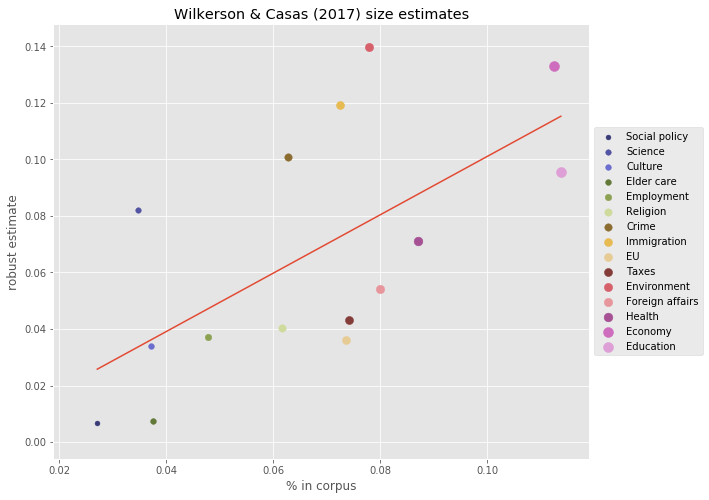

In [434]:
funcy = lambda x: x[('size_frac','')]
funcx = lambda x: x['doc_frac']
#size_col = 'recall_w'
size_col = False
#cat_performance.recall_w
ax = plot_dictionary_stats(cat_performance_1[0],funcx,funcy,title='Wilkerson & Casas (2017) size estimates',size_column=size_col)
ax.set_ylabel('robust estimate')
ax.set_xlabel('% in corpus')
ax.figure.savefig('output/research_conclusions/wilkerson_size_estimates_thres1.png')

/home/snorre/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


R2:  0.23517156232792136
Direct comparisons:  0.631111111111111
0.7369458128078817
R2:  0.40282732240446806
Direct comparisons:  0.7022222222222221
0.8059113300492611
R2:  0.412950811118697
Direct comparisons:  0.6508875739644969
0.6107692307692307
R2:  0.09445460179607523
Direct comparisons:  0.5694444444444443
0.5988142292490118


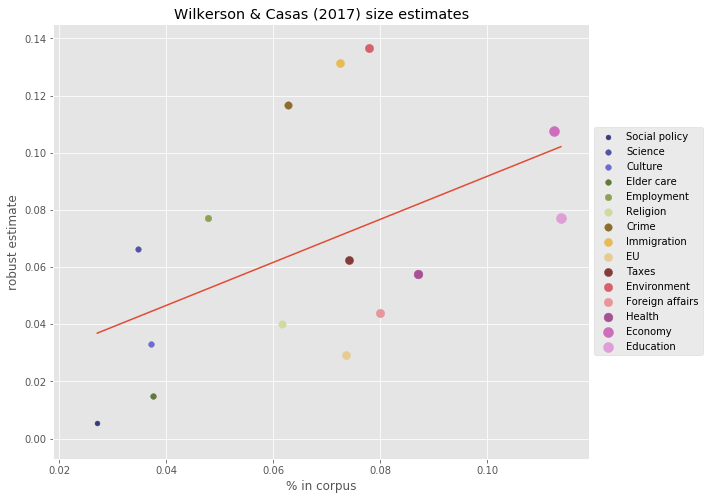

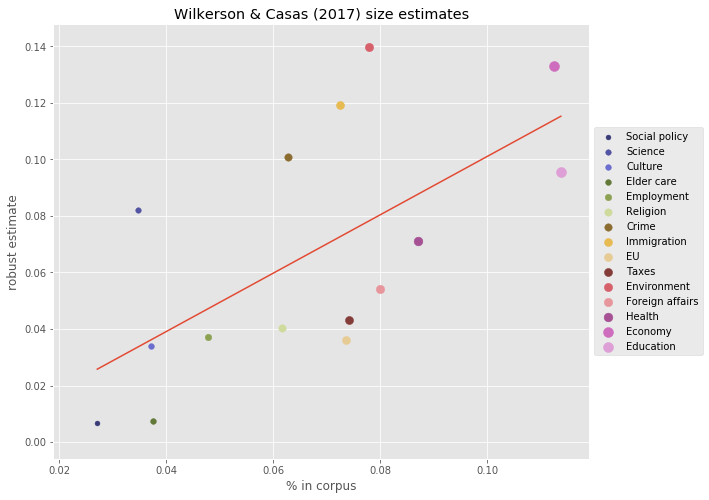

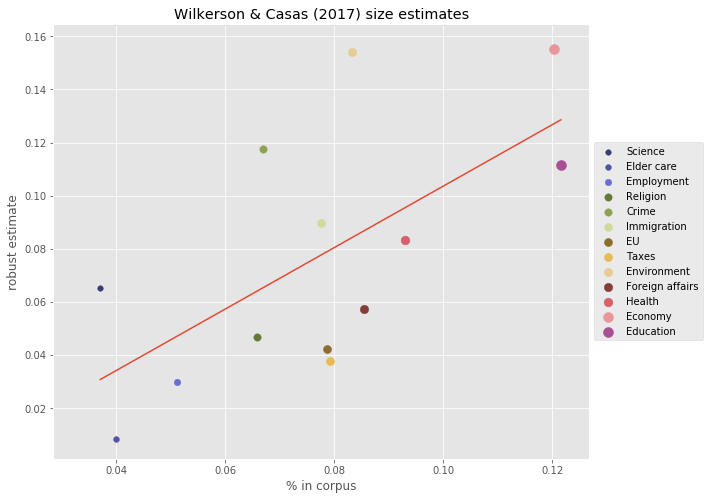

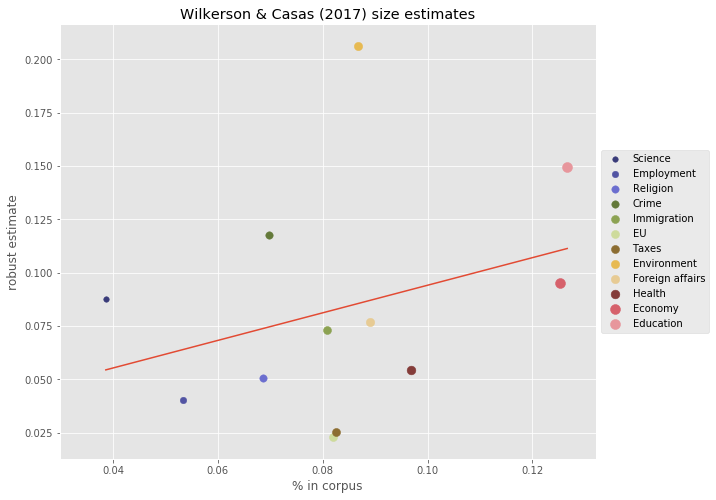

In [435]:
for i in range(1,5):
    cat_performance,r2,comparison_score = run_clus_comparison_analysis(i)
    funcy = lambda x: x[('size_frac','')]
    funcx = lambda x: x['doc_frac']
    #size_col = 'recall_w'
    size_col = False
    #cat_performance.recall_w
    ax = plot_dictionary_stats(cat_performance,funcx,funcy,title='Wilkerson & Casas (2017) size estimates',size_column=size_col)
    ax.set_ylabel('robust estimate')
    ax.set_xlabel('% in corpus')
    ax.figure.savefig('output/research_conclusions/wilkerson_size_estimates_thres%d.png'%i)

In [436]:
def quantify_de_ascending(x,y):
    asc = []
    sort_idx = x.argsort()
    y = y[sort_idx]
    for idx in range(len(x)):
        val = y[idx]
        larger = sum(val<y[idx+1:])
        length = len(y)-idx
        if idx>0:
            larger += sum(y[:idx]<val)
            length += idx
        asc.append(larger/length)
    return sum(asc)/len(x)



In [441]:
cat_performance,r2,comparison_score,error = run_clus_comparison_analysis(2)

R2:  0.40282732240446806
Direct comparisons:  0.7022222222222221
0.8059113300492611


/home/snorre/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [445]:
cat_performance

,topic_name,"(perc, max)","(perc, mean)","(size, mean)","(size, sum)","(size_frac, )","(topic_name, )",accuracy,accuracy_w,n,precision,precision_w,recall,recall_w,topic,topic_class,n_docs,doc_frac,diff
0,Crime,0.909602,0.864705,1213.250000,7279.500000,0.100726,Crime,0.864078,0.864876,103,0.800000,0.800000,0.878049,0.865843,12,12,2898,0.062715,0.000127
1,Culture,0.602983,0.511948,822.500000,2467.500000,0.034143,Culture,0.887500,0.880257,80,0.878049,0.878049,0.900000,0.804278,0,0,1717,0.037157,0.000945
2,EU,0.889925,0.847994,1304.133333,2608.266667,0.036090,EU,0.924731,0.919729,93,0.862745,0.862745,1.000000,1.000000,4,4,3403,0.073644,-0.000223
3,Economy,0.787586,0.686605,1372.797619,9609.583333,0.132967,Economy,0.831325,0.831332,83,0.829268,0.829268,0.829268,0.881923,11,11,5200,0.112532,-0.001468
4,Education,0.985364,0.786098,1150.050000,6900.300000,0.095479,Education,0.892473,0.888725,93,0.862745,0.862745,0.936170,0.969238,2,2,5256,0.113744,-0.001507
5,Elder care,0.788601,0.788601,528.333333,528.333333,0.007310,Elder care,0.894231,0.914662,104,0.844828,0.844828,0.960784,0.948013,13,13,1732,0.037482,0.000934
6,Employment,0.783634,0.573638,893.888889,2681.666667,0.037106,Employment,0.904255,0.907936,94,0.941176,0.941176,0.888889,0.869574,7,7,2211,0.047848,0.000602
7,Environment,0.874131,0.592957,1121.546296,10093.916667,0.139668,Environment,0.919643,0.903812,112,0.931034,0.931034,0.915254,0.904959,1,1,3601,0.077929,-0.000361
8,Foreign affairs,0.909733,0.758377,782.059231,3910.296154,0.054106,Foreign affairs,0.845361,0.834305,97,0.812500,0.812500,0.866667,0.869364,3,3,3696,0.079984,-0.000426
9,Health,0.965608,0.820615,1029.450000,5147.250000,0.071222,Health,0.867347,0.865416,98,0.808511,0.808511,0.904762,0.939880,5,5,4019,0.086974,-0.000650


In [443]:
cat_performance['diff'] = error

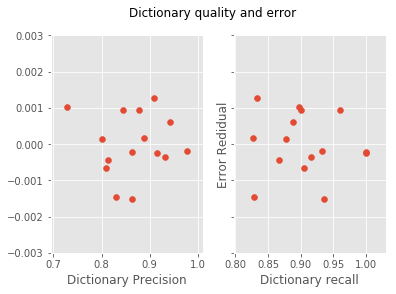

In [461]:
fig,axes = plt.subplots(1,2,sharey=True)
ax = axes[0]
ax.scatter(cat_performance.precision,cat_performance['diff'])
ax.set_ylim(-0.003,0.003)
ax.set_xlabel('Dictionary Precision')

ax = axes[1]
ax.scatter(cat_performance.recall,cat_performance['diff'])
ax.set_ylim(-0.003,0.003)
ax.set_ylabel('Error Redidual')
ax.set_xlabel('Dictionary recall')
fig.suptitle('Dictionary quality and error')
plt.savefig('output/research_conclusions/wilkerson_robust_error_residuals.png',)

In [377]:
y,y_pred = fit_function(x,y)

In [388]:
np.mean(abs(y-y_pred)/y)

1.2174723534951615

In [ ]:
s = cat_performance_1[0].n_docs.values
frac = s/s.sum()
frac.sum()

In [404]:
s = cat_performance_1[0].n_docs.values
frac = s/s.sum()
frac.sum()

0.9999999999999999

In [413]:
s = cat_performance_1[0].n_docs.values
frac = s/s.sum()
x = frac
y = cat_performance_1[0][('size_frac','')].values
import sklearn
xlim,y_pred,r2 = fit_function(x,y)
print('R2: ',r2)
print('Direct comparisons: ',quantify_de_ascending(x,y))



R2:  0.40282732240446806
Direct comparisons:  0.7022222222222221


In [411]:
fit_function(x,y)[0]

ValueError: operands could not be broadcast together with shapes (50,) (15,) 

In [354]:
x,y = s/s.sum(),cat_performance[('size_frac','')].values
import sklearn

print('R2: ',sklearn.metrics.r2_score(*fit_function(x,y)))
print('Direct comparisons: ',quantify_de_ascending(x,y))


R2:  0.9751584408449213
Direct comparisons:  0.6508875739644969


### 47 %  of comparisons are correct. R2 is 0.975

In [ ]:
# problematic terms in the crime lexicon.
#"grænsebomme","grænsekontrollen",
#'pape','pind'
# 'christiania','christianitterne','bekæmpe'

In [127]:
for w,lex in w2lex.items():
    if lex=='kriminal_kriminel':
        print(w)

røverier
politibetjentene
arresten
fængsler
fængslets
grænsekontrollen
politiets
fængslet
kriminalisere
afsone
løbebane
røveri
betjente
samfundstjeneste
justitsministerens
knivlov
fængsles
prøveløsladt
domstolenes
kriminalitet
politibetjente
levakovic
bandemedlem
justitsministeren
kriminalforsorgen
politiet
personfarlig
politi
politibetjent
indbrud
fængselsstraffe
illegal
retsordfører
fængselsstraf
grænsebommene
menneskehandel
bandemedlemmer
grænseoverskridende
grænsebomme
retspolitikken
ungdomskriminaliteten
retssystem
retssystemet
kriminaliserer
afsoning
arrest
politifolkene
domstolen
domstol
fodlænke
fodlænker
grænsebom
kriminelles
tyveri
kriminaliseres
kriminalisering
kriminel
bandekriminalitet
fængslerne
knivloven
politisamarbejde
prøveløslades
tyverier
betjentene
ungdomskriminelle
retspolitik
betjenten
illegale
kriminaliteten
grænsekontrol
justitsminister
betjentenes
prøveløsladelse
kriminaliseret
betjent
domstolene
politifolk
domstole
tyveriet
toldkontrol
narko
kriminelt
fængsel